In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import streamlit as st
import waipy
import pandas as pd
import altair as alt

In [2]:
from pages.additional.preprocessing import *
from pages.additional.plotting import *
from pages.additional.sup import *


x_orig.shape=(20160,)


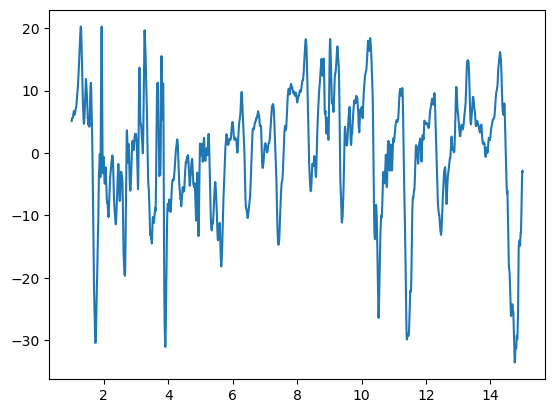

In [3]:
datapath = 'pages/app_data/current_data.csv'
data = pd.read_csv(datapath)
x_orig, y_orig = data.x, data.y
print(f'{x_orig.shape=}')
plt.plot(x_orig, y_orig)

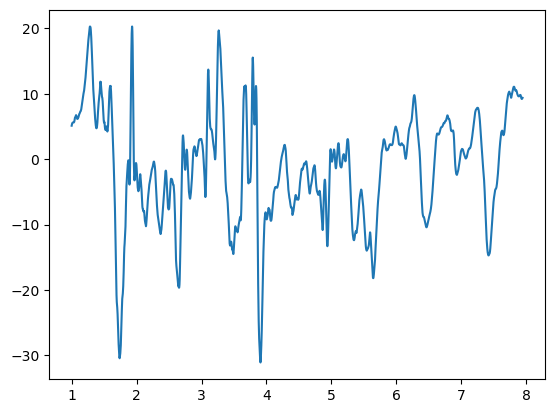

In [4]:
x = x_orig[:10000]
y = y_orig[:10000]
plt.plot(x,y)

## Mel 

In [5]:
max_power = 10

# Create an array of indices from 0 to max_power
indices = np.arange(max_power + 1)

# Calculate powers of 2 using the indices
powers_of_2 = np.power(2, np.arange(max_power + 1))

print(powers_of_2)

[   1    2    4    8   16   32   64  128  256  512 1024]


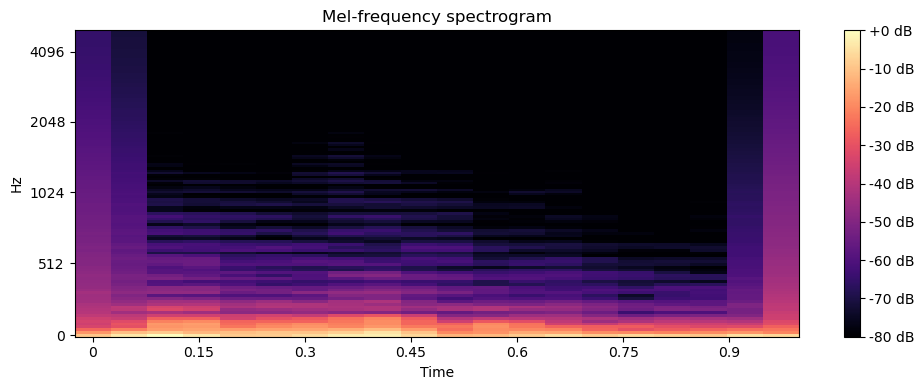

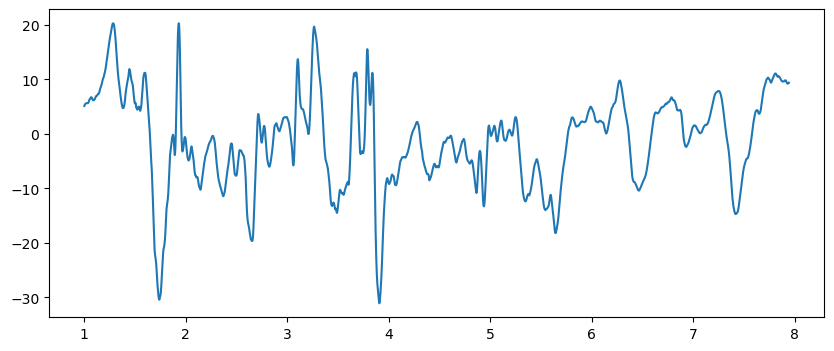

In [6]:
y = np.array(y)
x = np.array(x)
sr = 10000#st.slider('Sample rate', min_value=100, max_value=24000, value=22050)
S = librosa.feature.melspectrogram(y=np.array(y), sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 4))
plt.plot(x, y)
plt.show()

sr=1
type(S_dB)=<class 'numpy.ndarray'>
S_dB.shape=(128, 20)
type(S)=<class 'numpy.ndarray'>
S.shape=(128, 20)


c:\Users\Admin\anaconda3\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


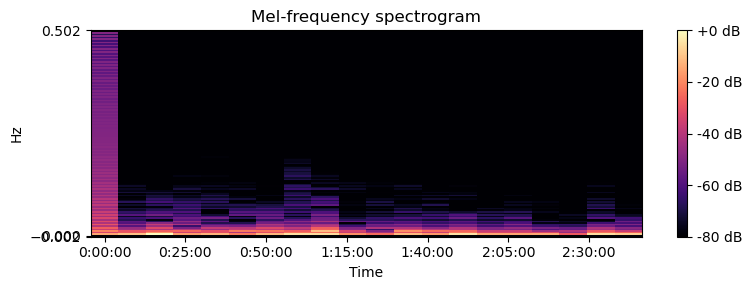

sr=10


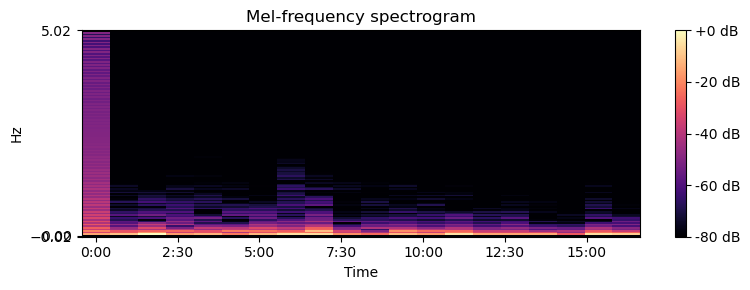

sr=10


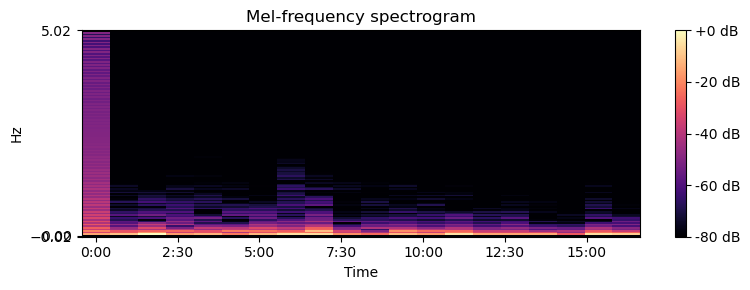

sr=10000


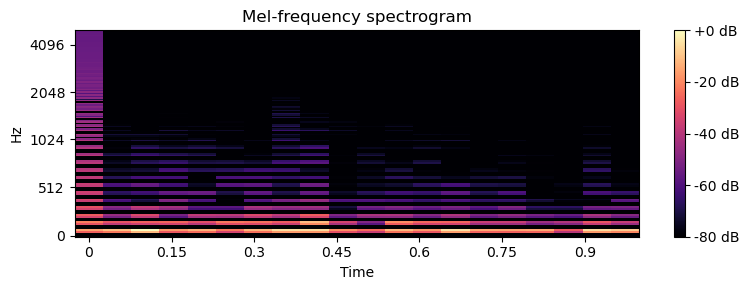

In [7]:
y = np.array(y)
x = np.array(x)
sr = 1#st.slider('Sample rate', min_value=100, max_value=24000, value=22050)
print(f'{sr=}')
S = librosa.feature.melspectrogram(y=np.array(y), sr=sr, n_fft=128)
fig = (8,3)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=fig)
print(f'{type(S_dB)=}')
print(f'{S_dB.shape=}')
print(f'{type(S)=}')
print(f'{S.shape=}')
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
# print(S_dB)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

sr = 10#st.slider('Sample rate', min_value=100, max_value=24000, value=22050)
print(f'{sr=}')
S = librosa.feature.melspectrogram(y=np.array(y), sr=sr, n_fft=128)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=fig)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


sr = 10#st.slider('Sample rate', min_value=100, max_value=24000, value=22050)
print(f'{sr=}')
S = librosa.feature.melspectrogram(y=np.array(y), sr=sr, n_fft=128)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=fig)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()


sr = 10000#st.slider('Sample rate', min_value=100, max_value=24000, value=22050)
print(f'{sr=}')
S = librosa.feature.melspectrogram(y=np.array(y), sr=sr, n_fft=128)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=fig)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()



In [8]:
y.shape

(10000,)

In [9]:
s0 = 401#st.slider('Smallest scale', min_value=1, max_value=4001, value=401, step=200)
s1 = 10#st.slider('Largest scale', min_value=1, max_value=4001, value=1001, step=200)
ds = 1.1#st.slider('Scale step', min_value=0.1, max_value=100., value=0.1)
nvoice = 400#st.slider('octaves / scale', min_value=3, max_value=20, value=6)
alpha = 1  # Alpha parameter for Morlet wavelet
mother = 'Morlet'  # Wavelet type
result = waipy.cwt(
    data=y,
    # Time-sample of the vector. Example: Hourly, daily, monthly, etc...
    dt=s0,
    # Pad the time series with zeroes to next pow of two length (recommended).
    pad=1,
    # Divide octave in sub-octaves. If dj = 0.25 this will do 4 sub-octaves per octave
    dj=ds,
    s0= 2*s0, #nvoice, # 2dt
    j1=(s1-s0)/ds,
    lag1=1,
    param=alpha,
    mother='Morlet',
    name='Morlet'
)
# result = waipy.cwt(y, s0, s1, ds, nvoice, (s1-s0)/ds, alpha, 6, mother=mother, name="Morlet")
print(f'{type(result)=}')
print(f'{len(result)=}')
print(f'{result.keys()}')
# label = 'Morlet wavelet'
# plt.figure(figsize=(10, 6))
# waipy.wavelet_plot(label, x, y, ds, result, plot_power=False, contour_levels=20, yscale='log', ylabel='Period')
# plt.show()

Nr of Scales: 11
scales [802.0, 1719.1246339082143, 3685.0243228304885, 7899.022556020985, 16931.925511037785, 36294.37686474311, 77798.69992584574, 166765.16400069155, 357468.9545029079, 766251.4782336202, 1642496.0, 3520767.250244026]
type(result)=<class 'dict'>
len(result)=20
dict_keys(['ondaleta', 'wave', 'period', 'scale', 'coi', 'power', 'sig95', 'global_ws', 'global_signif', 'joint_wavelet', 'imag_wavelet', 'nw', 'mean_wavelet', 'dj', 'j1', 'dt', 'fft', 'mother', 'data', 'name'])


c:\Users\Admin\anaconda3\Lib\site-packages\waipy\cwt\wavetest.py:401: RuntimeWarning: divide by zero encountered in divide
  sig95 = power / sig95  # where ratio > 1, power is significant
